# Economic vs EV sales

In this NoteBook, the economic impact of new energy vehicles is discussed, including GDP, and income.

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.graph_objs as go
import plotly.express as px
import matplotlib
import numpy as np
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots

## Parameters 

In [ ]:
EV_SALE_DATASET = '../Processed_Data/Ev_sales_per_capita.csv'
GDP_DATASET = '../Processed_Data/GDP_per_capita.csv'
INCOME_DATASET = '../Processed_Data/incomes.csv'
POPULATION_DATASET = '../Processed_Data/population.csv'

# Load Datasets
## Load the EV sales dataset

In [ ]:
df_EV = pd.read_csv(EV_SALE_DATASET).set_index("Unnamed: 0")
print(df_EV.shape)
df_EV.head()

(51, 4)


,2016,2017,2018,2019
Unnamed: 0,,,,
Alabama,0.000067,0.000077,0.000174,0.000201
Alaska,0.000126,0.000115,0.000210,0.000195
Arizona,0.000333,0.000433,0.001017,0.001074
Arkansas,0.000046,0.000063,0.000145,0.000179
California,0.001883,0.002406,0.003881,0.003667


## Load the GDP dataset

In [ ]:
df_GDP = pd.read_csv(GDP_DATASET).sort_values('GeoName').set_index('GeoName')
print(df_GDP.shape)
df_GDP.head()

(51, 25)


,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,33082.27,33956.49,34965.07,35313.39,35108.78,35807.86,36668.15,38983.79,40345.16,40456.16,...,39106.28,39340.89,38857.04,38983.07,39403.72,39894.70,40350.68,40648.99,39186.83,40652.70
Alaska,68863.79,66290.98,64967.77,62753.06,64632.78,66910.36,65321.38,66822.29,68456.97,72841.78,...,79719.77,75000.03,73461.78,74061.43,72969.96,72955.82,72181.61,72584.15,68484.70,68653.14
Arizona,35551.86,37486.73,39551.53,40390.66,40422.32,40898.12,42477.39,43223.61,44925.94,45475.70,...,41712.83,41668.89,41720.51,42085.67,42824.57,43962.63,44995.87,45809.18,44657.46,46373.01
Arkansas,31744.88,32201.64,33604.79,33551.89,33359.33,34350.70,35578.37,36998.26,38107.26,38437.20,...,36790.86,37483.66,37732.96,37824.14,37844.07,38078.49,38681.05,38875.25,38158.91,39892.55
California,42426.77,44523.62,46995.32,49905.07,49082.10,49395.79,50775.55,52028.86,53780.43,55590.52,...,55651.20,56911.77,58392.12,60500.17,61899.44,64472.52,66865.20,69266.30,67435.03,73179.98


## Load the income dataset

In [ ]:
df_Income = pd.read_csv(INCOME_DATASET).sort_values('GeoName').set_index("GeoName")
print(df_Income.shape)
df_Income.head()

(51, 42)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,7957,8796,9272,9906,10848,11604,12223,12864,13807,14986,...,35824,36014,37055,38531,39014,40252,41607,43157,45524,48608
Alaska,15507,17091,19424,19478,19701,20593,20331,19688,20420,22133,...,53708,52812,55867,57575,56278,57278,59783,61639,63391,67138
Arizona,9671,10764,11141,11941,13060,14000,14733,15280,16044,16803,...,36545,37139,38756,40334,41473,43301,45299,47242,51332,54301
Arkansas,7597,8592,9024,9513,10543,11165,11708,12139,13022,13946,...,36582,36677,38749,39968,40873,42056,43661,45037,47522,51148
California,11945,13158,13793,14582,15895,16795,17588,18482,19605,20561,...,48121,48502,51266,54546,56560,58813,61509,64333,69958,76386


## Load the population dataset

In [ ]:
df_Population = pd.read_csv(POPULATION_DATASET).sort_values('GeoName').set_index("GeoName")
print(df_Population.shape)
df_Population.head()

(51, 72)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,3058000,3059000,3068000,3053000,3014000,3050000,3071000,3109000,3163000,3204000,...,4839261,4864399,4886793,4908162,4930595,4952202,4976395,5003418,5024803,5039877
Alaska,135000,158000,189000,205000,215000,222000,224000,231000,224000,224000,...,731106,738057,737638,739127,743410,741949,737717,734823,732441,732673
Arizona,756000,785000,842000,894000,933000,987000,1053000,1125000,1193000,1261000,...,6507351,6563216,6638196,6714328,6801591,6879830,6969944,7070511,7177986,7276316
Arkansas,1908000,1901000,1838000,1780000,1734000,1725000,1704000,1733000,1726000,1756000,...,2948887,2954685,2961191,2970352,2980602,2990801,2997271,3004248,3012232,3025891
California,10677000,11134000,11635000,12251000,12746000,13133000,13713000,14264000,14880000,15467000,...,37970368,38291358,38636290,38966055,39223210,39424071,39535906,39547996,39499738,39237836


## Merge into one dataframe

In [ ]:
df_economic = pd.concat([df_Income['2019'].rename('income'), \
                               df_GDP['2019'].rename('GDP'),\
                               df_EV['2019'].rename('EV_sale'),
                        df_Population['2019'].rename('Population')],\
                              axis = 1)
df_economic = df_economic.dropna()
print(df_economic.shape)
df_economic.head()

(51, 4)


,income,GDP,EV_sale,Population
Alabama,43157,40648.99,0.000201,5003418
Alaska,61639,72584.15,0.000195,734823
Arizona,47242,45809.18,0.001074,7070511
Arkansas,45037,38875.25,0.000179,3004248
California,64333,69266.30,0.003667,39547996


# Analyze Economic, GDP vs Income

We will use a scatter plot to represent their relationship from the prominent cities analysed. The cities with the highest gdp, income and the lowest gdp and income respectively

In [ ]:
highest_income = df_economic.sort_values(by='income',ascending=False).index[0]
highest_gdp = df_economic.sort_values(by='GDP',ascending=False).index[0]
highest_sale = df_economic.sort_values(by='EV_sale',ascending=False).index[0]
lowest_income = df_economic.sort_values(by='income',ascending=True).index[0]
lowest_gdp = df_economic.sort_values(by='GDP',ascending=True).index[0]
highest_income, highest_gdp, lowest_income, lowest_gdp,highest_sale

('District of Columbia',
 'District of Columbia',
 'Mississippi',
 'Mississippi',
 'California')

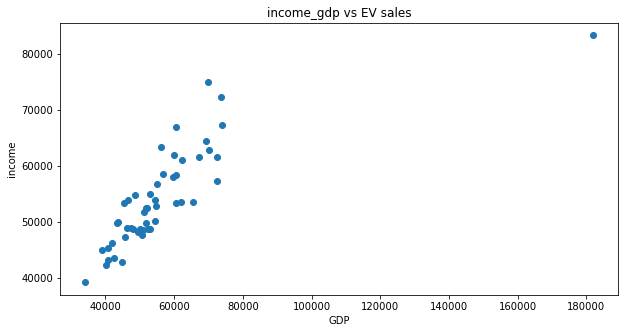

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(df_economic['GDP'],df_economic['income'])
plt.title("income_gdp vs EV sales")
plt.xlabel("GDP")
plt.ylabel("income")
plt.show()

#### We can see that GDP and income are proportional, but there is a lack of indication of EV sales. Each point represents a state, so we use EV sales to assign a size to the points

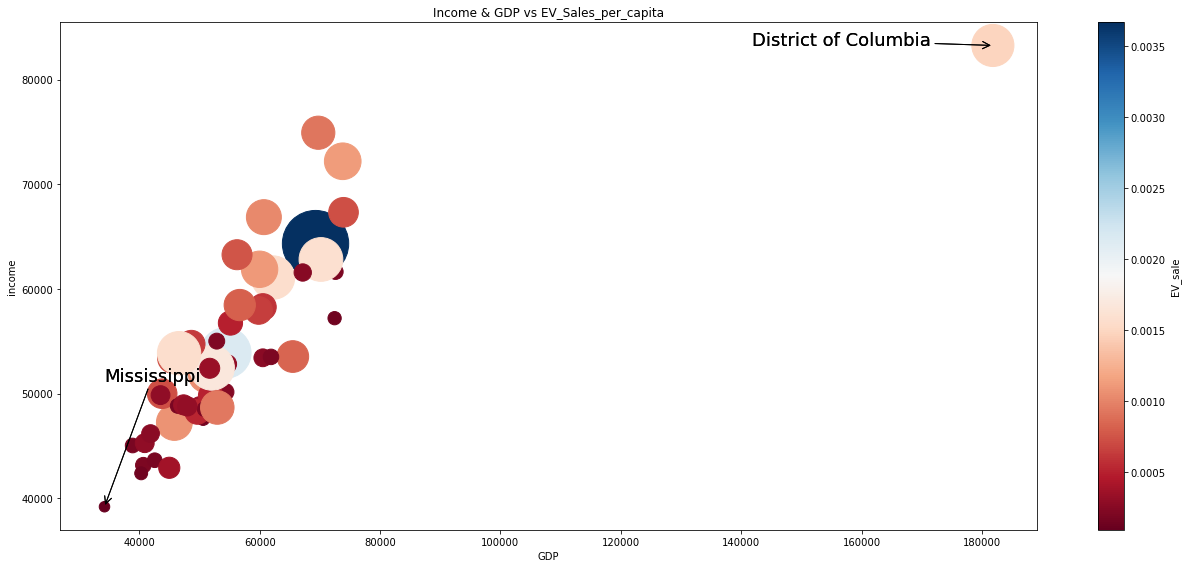

In [ ]:
def draw(df_economic, ax, size_scale=1200000, *args, **kwargs):
    df_economic.plot.scatter(x='GDP',y='income',s=(df_economic['EV_sale'])*size_scale, ax=ax,*args, **kwargs)
fig, ax = plt.subplots(figsize=(18,8))
ax.ticklabel_format(style='plain')
draw(df_economic, ax, c='EV_sale', colormap='RdBu', colorbar=True)
## hightlight states
plt.annotate(highest_income, xy = (df_economic.loc[highest_income][['GDP', 'income']]), xytext = df_economic.loc[highest_income][['GDP', 'income']] +(-40000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_gdp, xy = (df_economic.loc[highest_gdp][['GDP', 'income']]), xytext = df_economic.loc[highest_gdp][['GDP', 'income']] +(-40000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (df_economic.loc[lowest_income][['GDP', 'income']]), xytext = df_economic.loc[lowest_income][['GDP', 'income']] +(-0, +12000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (df_economic.loc[lowest_income][['GDP', 'income']]), xytext = df_economic.loc[lowest_income][['GDP', 'income']] +(-0, +12000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )

plt.title("Income & GDP vs EV_Sales_per_capita")
ax.set_xlabel('GDP')
ax.set_ylabel('income')
fig.tight_layout()

#### The highest as well as the lowest revenues and gdp correspond to the highest and lowest sales respectively. This is similar to our forecast. But the data for California is too large for us to see a significant change. So we removed California

In [ ]:
new = df_economic.drop("California")
new = new.drop("District of Columbia")

In [ ]:
highest_income = new.sort_values(by='income',ascending=False).index[0]
highest_gdp = new.sort_values(by='GDP',ascending=False).index[0]
highest_sale = new.sort_values(by='EV_sale',ascending=False).index[0]
lowest_income = new.sort_values(by='income',ascending=True).index[0]
lowest_gdp = new.sort_values(by='GDP',ascending=True).index[0]
highest_income, highest_gdp, lowest_income, lowest_gdp, highest_sale

('Connecticut', 'New York', 'Mississippi', 'Mississippi', 'Hawaii')

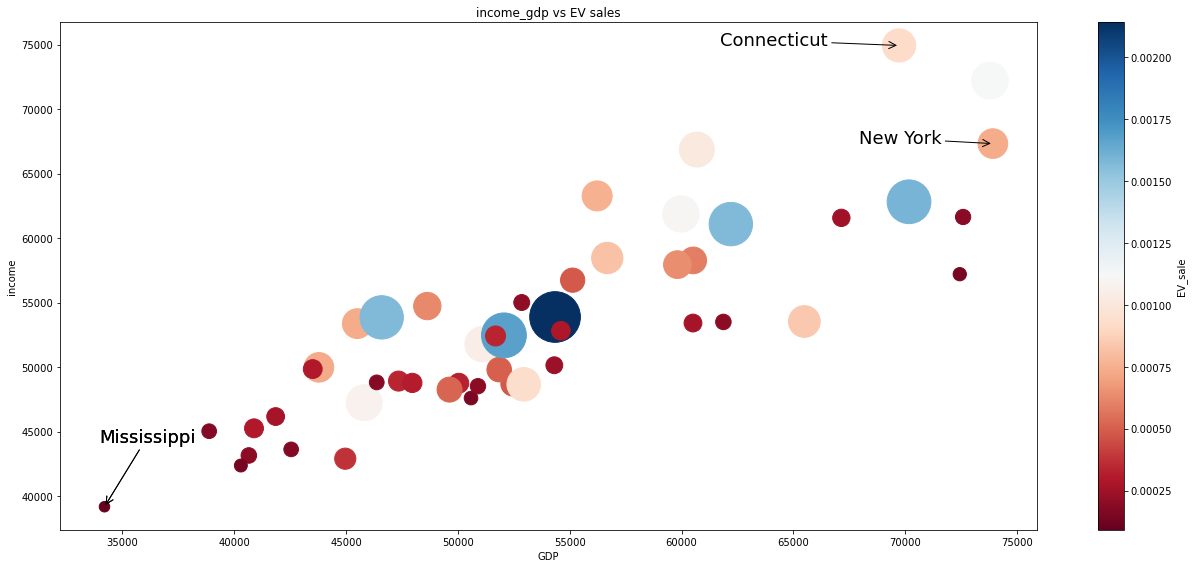

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
ax.ticklabel_format(style='plain')
draw(new, ax, c='EV_sale', colormap='RdBu', colorbar=True)


plt.annotate(highest_income, xy = (new.loc[highest_income][['GDP', 'income']]), xytext = new.loc[highest_income][['GDP', 'income']] +(-8000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_gdp, xy = (new.loc[highest_gdp][['GDP', 'income']]), xytext = new.loc[highest_gdp][['GDP', 'income']] +(-6000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (new.loc[lowest_income][['GDP', 'income']]), xytext = new.loc[lowest_income][['GDP', 'income']] +(-250, +5000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (new.loc[lowest_income][['GDP', 'income']]), xytext = new.loc[lowest_income][['GDP', 'income']] +(-250, +5000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )


plt.title("income_gdp vs EV sales")
ax.set_xlabel('GDP')
ax.set_ylabel('income')
fig.tight_layout()

# Save as png image
fig.savefig('./Images/Income_GDP_vs_EVsales.png', format='png')

In [ ]:
new1= new.drop("Hawaii")
highest_income = new1.sort_values(by='income',ascending=False).index[0]
highest_gdp = new1.sort_values(by='GDP',ascending=False).index[0]
highest_sale = new1.sort_values(by='EV_sale',ascending=False).index[0]
lowest_income = new1.sort_values(by='income',ascending=True).index[0]
lowest_gdp = new1.sort_values(by='GDP',ascending=True).index[0]
highest_income, highest_gdp, lowest_income, lowest_gdp, highest_sale

('Connecticut', 'New York', 'Mississippi', 'Mississippi', 'Oregon')

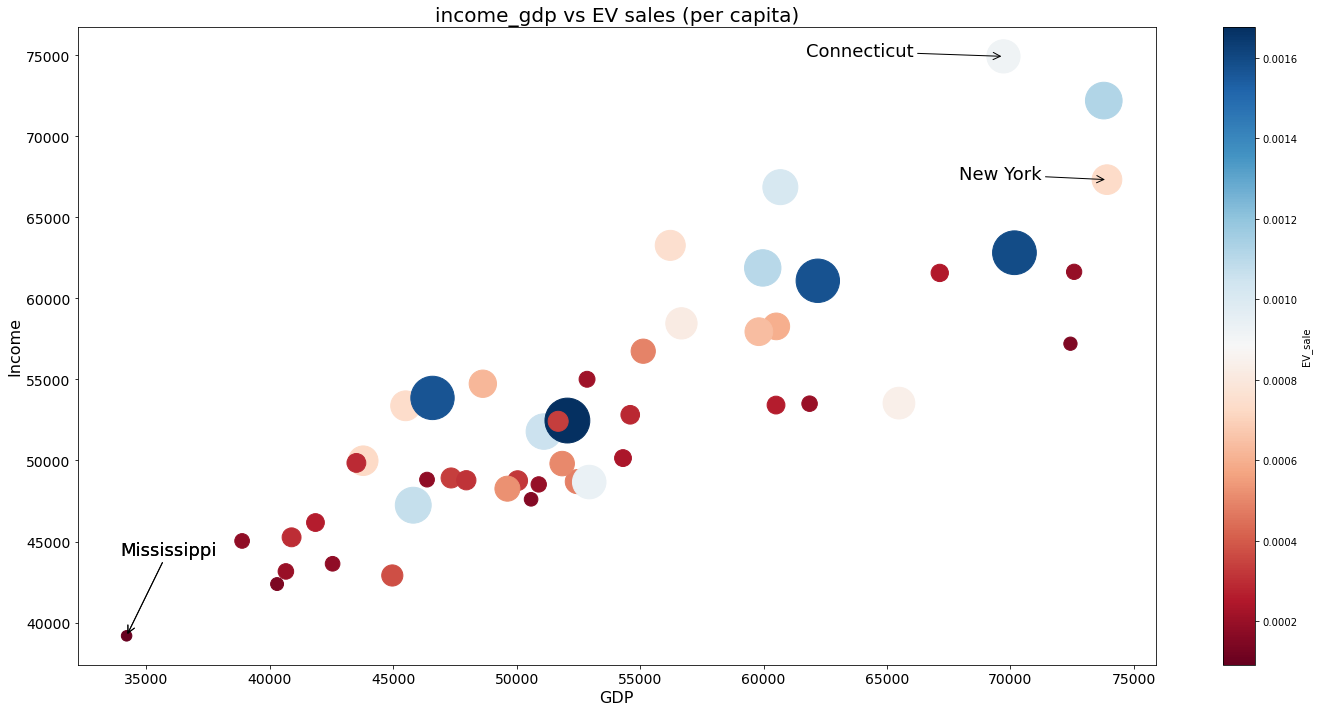

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
ax.ticklabel_format(style='plain')
draw(new1, ax, c='EV_sale', colormap='RdBu', colorbar=True)


plt.annotate(highest_income, xy = (new.loc[highest_income][['GDP', 'income']]), xytext = new.loc[highest_income][['GDP', 'income']] +(-8000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_gdp, xy = (new.loc[highest_gdp][['GDP', 'income']]), xytext = new.loc[highest_gdp][['GDP', 'income']] +(-6000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (new.loc[lowest_income][['GDP', 'income']]), xytext = new.loc[lowest_income][['GDP', 'income']] +(-250, +5000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (new.loc[lowest_income][['GDP', 'income']]), xytext = new.loc[lowest_income][['GDP', 'income']] +(-250, +5000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )


plt.title("income_gdp vs EV sales (per capita)", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("GDP", fontsize=16)
plt.ylabel("Income", fontsize=16)

fig.tight_layout()


# Save as png image
fig.savefig('./Images/Income_GDP_vs_EVsales.png', format='png')

#### The change in the data is now becoming more apparent: a proportional trend. But the highest GDP corresponds not to the highest sales, the highest income corresponds to the highest sales. So which factor has the greatest influence on the factor of sales, GDP?

We will model each of these two factors to derive R^2. The correlation will be derived from the magnitude of R^2

In [ ]:
## df_EV.head(), df_gdp.head(), df_income.head()

In [ ]:
df_economic.head()

,income,GDP,EV_sale,Population
Alabama,43157,40648.99,0.000201,5003418
Alaska,61639,72584.15,0.000195,734823
Arizona,47242,45809.18,0.001074,7070511
Arkansas,45037,38875.25,0.000179,3004248
California,64333,69266.30,0.003667,39547996


# GDP

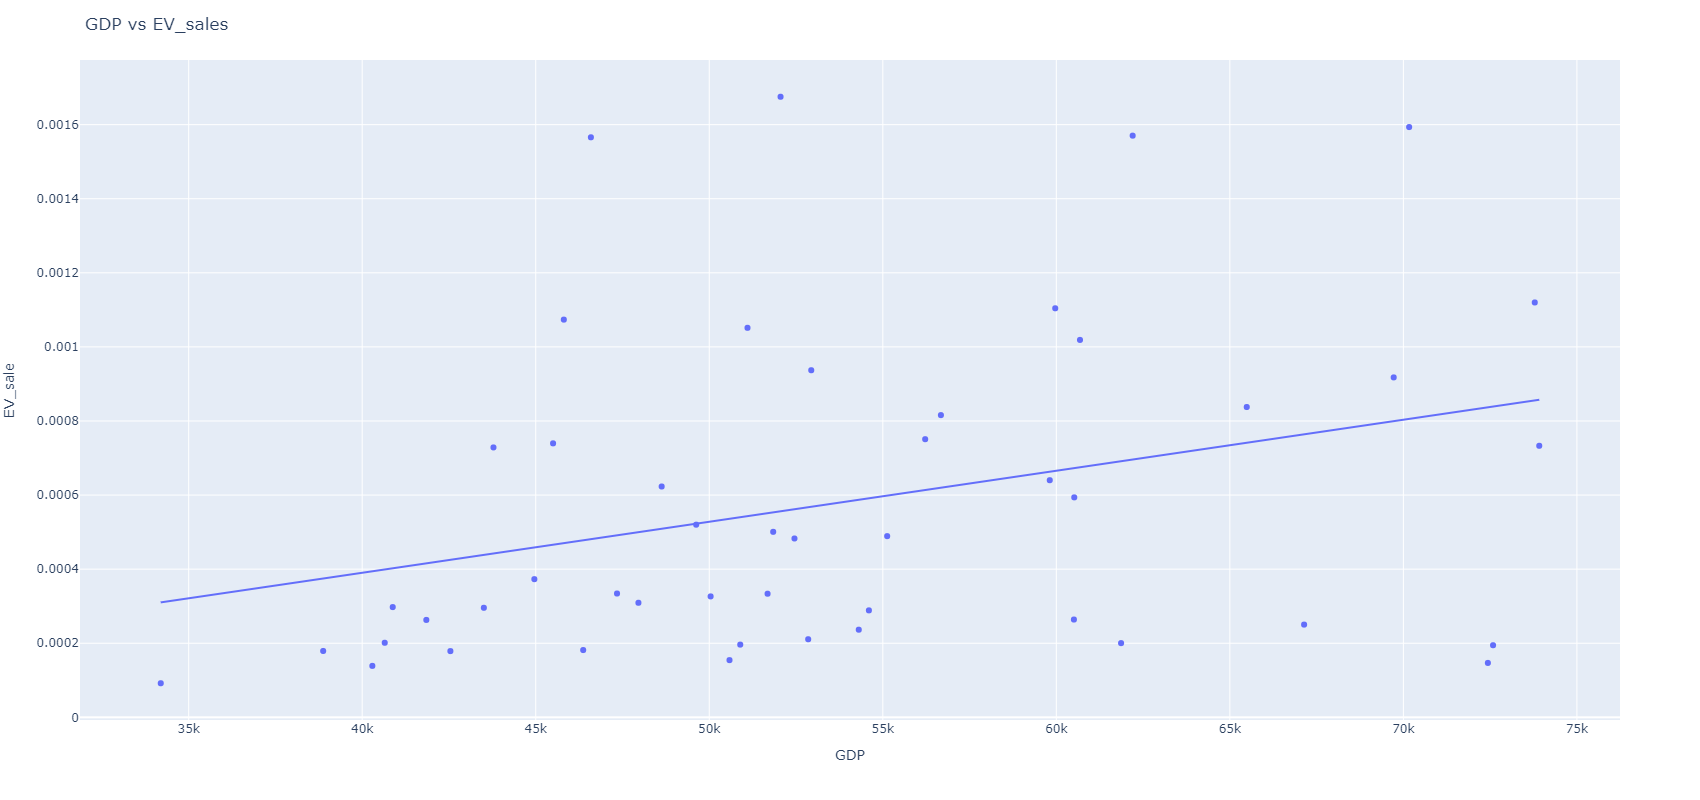

In [40]:
fig = px.scatter(new1, x=new1['GDP'], y=new1['EV_sale'],trendline='ols')
fig.layout.update(
    width=1700,
    height=800,
    title_text = 'GDP vs EV_sales')
fig.show()

# Income

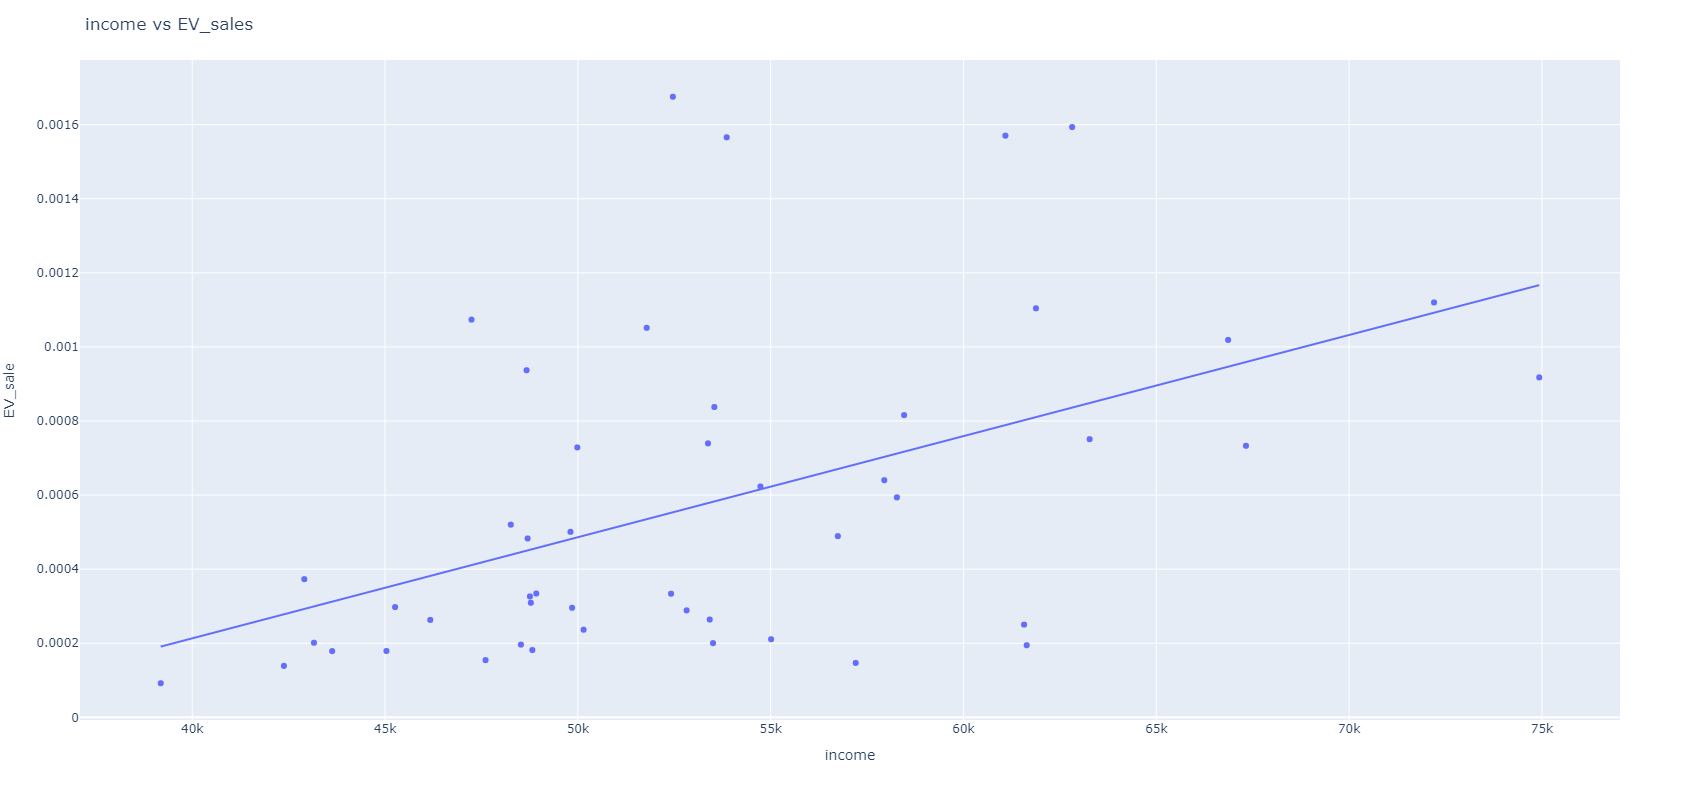

In [39]:
fig = px.scatter(new1, x=new1['income'], y=new1['EV_sale'],trendline='ols')
fig.layout.update(
    width=1700,
    height=800,
    title_text = 'income vs EV_sales')
fig.show()

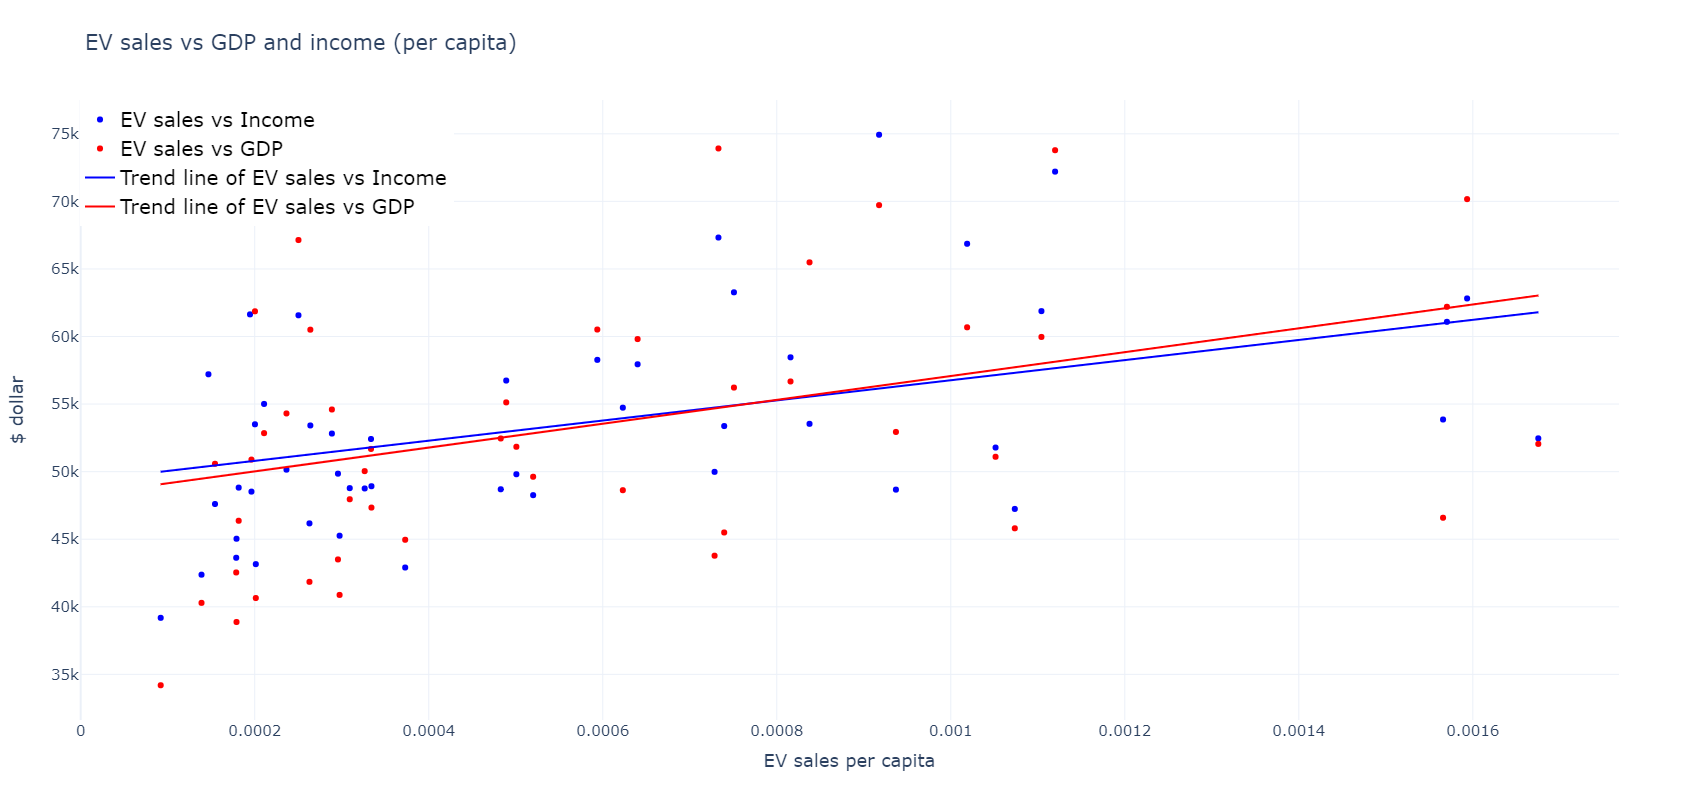

In [35]:
trace0 = go.Scatter(x=new1['EV_sale'], 
                y=new1['income'], 
                mode='markers',
                    name= 'EV sales vs Income',
                marker_color='blue')
trace1 = go.Scatter(x=new1['EV_sale'], 
                y=new1['GDP'], 
                mode='markers',
                    name= 'EV sales vs GDP',
                marker_color='red',
                    
                   )
trace2 = go.Scatter(x=new1['EV_sale'], 
                    y= 7.44877e+06 *new1['EV_sale']+ 49311.5, 
                    mode = "lines",name="Trend line of EV sales vs Income", 
                    marker_color = "blue"
                    )
trace3 = go.Scatter(x=new1['EV_sale'], 
                    y= 8.82381e+06 *new1['EV_sale']+ 48255.5, 
                    mode = "lines",
                    name="Trend line of EV sales vs GDP", 
                    marker_color = "red")
data1 = [trace0, trace1, trace2, trace3]
layout = go.Layout(title="EV sales vs GDP and income (per capita)",
                   font_size=15,
                   xaxis=dict(title= "EV sales per capita"),
                   yaxis=dict(title="$ dollar"),
                   legend=dict(x=0, y=1, font=dict(size=20, color="black")))
fig = go.Figure(data=data1, layout=layout)
fig.update_layout(
    width=1600,
    height=800,
    template='plotly_white'
)
fig.show()

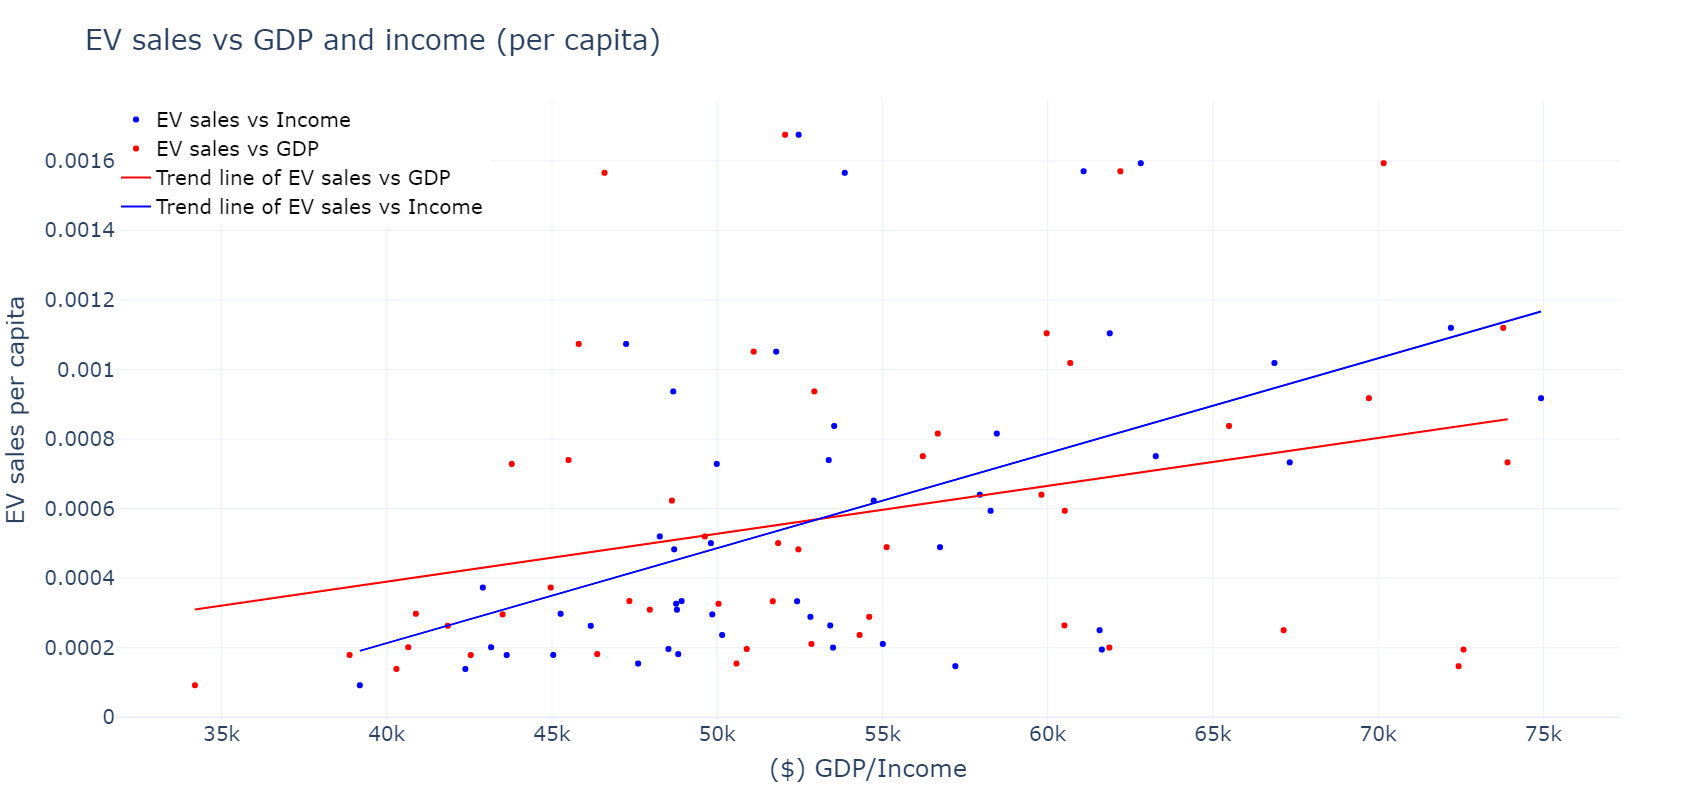

In [45]:
trace0 = go.Scatter(x=new1['income'], 
                y=new1['EV_sale'], 
                mode='markers',
                    name= 'EV sales vs Income',
                marker_color='blue')
trace1 = go.Scatter(x=new1['GDP'], 
                y=new1['EV_sale'], 
                mode='markers',
                    name= 'EV sales vs GDP',
                marker_color='red',
                    
                   )
trace2 = go.Scatter(x=new1['GDP'], 
                    y= 1.37721e-08 *new1['GDP']+ -0.00016093, 
                    mode = "lines",name="Trend line of EV sales vs GDP", 
                    marker_color = "red"
                    )
trace3 = go.Scatter(x=new1['income'], 
                    y= 2.72992e-08 *new1['income']+ -0.0008788, 
                    mode = "lines",
                    name="Trend line of EV sales vs Income", 
                    marker_color = "blue")
data1 = [trace0, trace1,trace2,trace3]
layout = go.Layout(title="EV sales vs GDP and income (per capita)",
                   font_size=20,
                   xaxis=dict(title= "($) GDP/Income"),
                   yaxis=dict(title="EV sales per capita"),
                   legend=dict(x=0, y=1, font=dict(size=20, color="black")))
fig = go.Figure(data=data1, layout=layout)
fig.update_layout(
    width=1600,
    height=800,
    template='plotly_white'
)
fig.show()

## Conclusion

GDP and income are directly proportional. and they both proportional to EV sales